<a href="https://colab.research.google.com/github/ShaileshDonthi/GIS/blob/main/AI_Adoption_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIS Project on AI Adoption in Governance in Developing Countries**

**Presented by OJOBO AGBO EJE and SHAILESH REDDY DONTHI**

# **INTRODUCTION**

Artificial intelligence leverages computers and machines to mimic the problem-solving and decision-making capabilities of the human mind. With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy, it is expected that many countries would have adopted AI in the delivery of public service to their citizens.

Although most developed countries are adopting AI swiflty, research shows that many countries, especially in Africa and Asia are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

The goal of this project is to ascertain how ready governments in developing nations are to implement AI in the delivery of public service to their citizens, with a focus on certain factors.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

Oxford Insights is a U.K based organizations that help governments around the world to increase their impact.


**Existing Literature on Artificial Intelligence Adoption**


With the high potential of artificial intelligence to provide solutions in different sectors of the economy, ranging from business to education, aviation, health, service delivery, etc, one will assume that its adoption will be quickly embraced.

Previous research have pointed out that this is not the case, pointing out certain factors that could support or hinder the adoption of Artificial Intelligence.

**Some of the existing literature are quoted:**

1. "Despite the enormous potential of artificial intelligence (AI), many public organizations struggle to adopt this technology. Simultaneously, empirical research on what determines successful AI adoption in public settings remains scarce."  [(Oliver Neumann, etal,2022)](https://https://colab.research.google.com/drive/10PxEXExgKmmVRzoLGuPAks-R1Ep93Mtu#scrollTo=-6oOiQ1zmIfS&line=2&uniqifier=1)

2. "Factors influencing adoption at the individual level were related to trust, security, purchase price, intrinsic motivation, social influence, utilitarian benefit whereas at the organizational level, it was related to the technical competencies, strategic road mapping for AI, top management support and the digital maturity of the organization." [(Jayanthi Radhakrishnan, etal,2020)](https://link.springer.com/chapter/10.1007/978-3-030-64849-7_9)

3. "Despite the current popularity of artificial intelligence (AI) and a steady increase in publications over time, few studies have investigated AI in public contexts. As a result, assumptions about the drivers, challenges, and impacts of AI in government are far from conclusive." [(Averill Campion, etal,2022)](https://journals.sagepub.com/doi/full/10.1177/0894439320979953)

Our work seeks to contribute to this body of knowledge, with a focus on developing nations.

**Importing Relevant Libraries**

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import seaborn as sns
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np
!pip install pandas geopandas matplotlib openpyxl
import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

!pip install plotly pandas
import plotly.express as px
!pip install mapclassify
import mapclassify #need for thematic map classification

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

# **DATA COLLECTION AND EXPLORATION**

**Data Sources**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com:
Data: [OpenData](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/map/?flg=en-us&location=2,42.07882,0.00845&basemap=jawg.light)

Some variables and their invdividual sources:

AI Papers:
Data: [SJR](https://docs.google.com/spreadsheets/d/1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb/export?format=csv), Year: 2022

Foundational I.T Infrastructure:
Data: [World Bank GovTech Maturity Index](https://www.worldbank.org/en/programs/govtech/2022-gtmi), Year: 2022

Open Data:
Data: [Global Data Barometer](https://globaldatabarometer.org/module/governance/), Year: 2022

Research and Development Spending:
Data: [UNESCO](http://data.uis.unesco.org/), Year: 2020-2022

Percentage Poverty per Country:
Data: [Wikipedia](https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty), Year: 2018-2022

Telecommunications Infrastructure:
Data: [UN e-Government Survey](https://https://publicadministration.un.org/en/Research/UN-e-Government-Surveys)

Graduates in STEM:
Data:
[UNESCO](https://http://data.uis.unesco.org/)

**Factors to be Considered in the Research**

The variables/factors that were considered:

1. Graduates in STEM: This is the percentage of graduates that graduated from Science, Technology and Mathematics programs (STEM) as compared to other general study programs.
2. Foundational IT Infrastructure: How much infrastructure does the country have to support technological advancements. A score given by the World Bank based on factors such as Availability of Internet Connectivity, Data centers and cloud services, the extent of which the government is digitized, and the strength of cybersecurity measures, (GTMI score)
3. Adoption of Emerging Technologies
4. AI research papers: The number of Citable AI papers by country published with citations.
5. Government responsiveness to change: An index measured by Global Competitiviness report in 2019, which takes into consideration factors like: Policy adoption, support for innovation and crisis management
6. R&D Spending: Measured by global innovation index, it is a measure of R&D spending both by governments and private corporations or groups, here the data is log transformed to normalize the data and reduce variability and make the relations more obvious
7. Poverty Rate: The Poverty rate was measured by the percentatge of the population of the country that earns less than $2.60 per day.

In [ ]:
#Data showing the country boundaries was collected from Open Data Soft:

! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #To Unzip
wd_map = gpd.read_file('world-administrative-boundaries.shp') #To load the shapefile with gpd as wd_map

<Axes: >

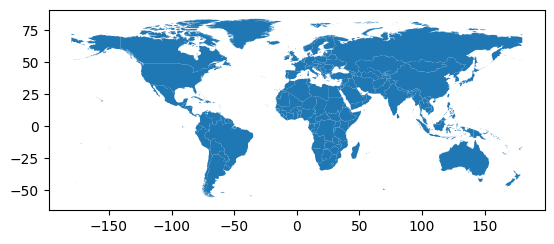

In [ ]:
#General Map of the World
wd_map.plot()
#print(wd_map)

**Data Exploration**

We want to explore the type of data for each of the variables from the world map.

In [ ]:
wd_map.dtypes

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [ ]:
#pd.set_option('display.max_rows', None)

# Now print the DataFrame
#print(wd_map['name'])

In [ ]:
#wd_map.head(2)

In [ ]:
#keep it simple!
wd_map=wd_map[['name','geometry']]

In [ ]:
#Renaming column, so it matches the data that will be merged
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-14-c7e956c3e55d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_map.rename(columns={'name': 'Country'}, inplace=True)


In [ ]:

# Rename two countries
rename_mapping = {'CÃ´te d\'Ivoire': 'Ivory Coast', 'Libyan Arab Jamahiriya': 'Libya', }

# Apply the renaming
for old_name, new_name in rename_mapping.items():
    if old_name in wd_map:
        index_to_update = wd_map.index(old_name)
        wd_map[index_to_update] = new_name

In [ ]:
len(wd_map)

256

**Countries under consideration (Developing countries, Mainly Africa and Asia areas)**

In [ ]:
countries_to_keep = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
                     'Comoros', 'Congo', "Ivory Coast", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
                     'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
                     'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
                     'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia',
                     'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
                     'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
                     'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'United Republic of Tanzania', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
                     'Uzbekistan', 'Vietnam', 'Yemen']



len(countries_to_keep)
wd_dev_map = wd_map[wd_map['Country'].isin(countries_to_keep)]

100

In [ ]:
wd_dev_map.columns

Index(['Country', 'geometry'], dtype='object')

<Axes: >

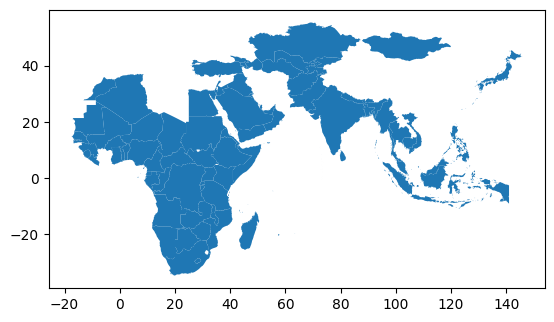

In [ ]:
#World Map Based on Countries Being Considered
wd_dev_map.plot()

# **DATA PROCESSING**

**Data Processing for AI Readiness Factors Being Considered**

Cleaning out the unnecessary variables, leaving only the ones required for our research based on the factors we are considering.

In [ ]:
#Import the Data_1: AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')

In [ ]:
#Exploring the Data Types of the variables
#ai_readiness_indicators.dtypes

In [ ]:
#Data to use
ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(countries_to_keep)]

In [ ]:
#Let us remove the unnecesary variables, leaving only the necessary variables
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure','Adoption of Emerging Technologies','Government responsiveness to change','R&D Spending (log transformation)']]

In [ ]:
#Exploring the first 5 Rows
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,Government responsiveness to change,R&D Spending (log transformation)
0,Afghanistan,11.25,41.46,NaN,NaN,NaN
2,Algeria,30.13,49.33,47.15,48.18,22.99
4,Angola,12.01,43.58,16.41,31.42,1.71
7,Armenia,17.72,70.50,47.72,50.59,10.20
10,Azerbaijan,24.16,69.39,62.72,75.41,10.87


In [ ]:
#Remove Empty Data
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,Government responsiveness to change,R&D Spending (log transformation)
2,Algeria,30.13,49.33,47.15,48.18,22.99
4,Angola,12.01,43.58,16.41,31.42,1.71
7,Armenia,17.72,70.50,47.72,50.59,10.20
10,Azerbaijan,24.16,69.39,62.72,75.41,10.87
12,Bahrain,15.78,74.05,65.71,70.32,5.18


**Data Processing on Poverty Rate Across the World**

The Poverty rate was measured by the percentatge of the population that lives on less than $2.60 per day

In [ ]:
#Import the Data on Poverty Rate Across the World

poverty_rate = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',
                            match="Country")[1]

poverty_rate = poverty_rate[poverty_rate['Country'].isin(countries_to_keep)]

poverty_rate.head()

,Country,World Bank[2],Year,Our World in Data[9],Year.1
2,Afghanistan,"54,5%",2016.0,"54,5%",2016.0
3,Angola,"32,3%",2018.0,"32,3%",2018.0
6,United Arab Emirates,NaN,NaN,NaN,NaN
8,Armenia,"26,5%",2021.0,27%,2020.0
12,Azerbaijan,6%,2012.0,6%,2012.0


In [ ]:
#Data to use
#Remove Empty Data
poverty_rate=poverty_rate.iloc[1:, :]
poverty_rate = poverty_rate[['Country','World Bank[2]']]
poverty_rate.rename(columns={'World Bank[2]': '$2.60'}, inplace=True)

poverty_rate['$2.60'] = poverty_rate['$2.60'].str.replace(',', '.', regex=False)
poverty_rate['$2.60'] = poverty_rate['$2.60'].str.replace('%', ' ', regex=False)

# Convert to numeric, if necessary
poverty_rate['$2.60'] = pd.to_numeric(poverty_rate['$2.60'])

poverty_rate.head()

,Country,$2.60
3,Angola,32.3
6,United Arab Emirates,NaN
8,Armenia,26.5
12,Azerbaijan,6.0
13,Burundi,64.9


**Data Processing on AI Cited Papers Across the Countries**

In [ ]:
#AI Papers Cited
sheet_id = '1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'

data = pd.read_csv(sheet_url)

In [ ]:
sheet_id = '1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(sheet_url)
ai_paper=df

In [ ]:
ai_paper.head(5)

,Rank,Country,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,Asiatic Region,42631,42293,30430,22521,0.71,357
1,2,India,Asiatic Region,23089,22346,10605,5596,0.46,186
2,3,United States,Northern America,13765,13101,11101,3278,0.81,612
3,4,United Kingdom,Western Europe,5132,4816,6097,1180,1.19,334
4,5,Germany,Western Europe,4241,4001,2821,938,0.67,264


In [ ]:
#Data to use
#Remove Empty Data
ai_paper=ai_paper.iloc[1:, :]
ai_paper = ai_paper[ai_paper['Country'].isin(countries_to_keep)]
ai_paper = ai_paper[['Country','Citable documents']]
ai_paper.head()

,Country,Citable documents
1,India,22346
5,Japan,3964
7,Indonesia,3226
11,South Korea,2546
12,Malaysia,2127


In [ ]:
# Merge the first two datasets
merged_df = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Merge the third dataset
merged_df1 = pd.merge(merged_df, ai_paper, on='Country')

# Merge the fourth dataset
merged_df2 = pd.merge(merged_df1, poverty_rate, on='Country')

wd_dev_map1=merged_df2

# **ANALYSIS**

**1. CORRELATION MATRIX**

We are using a correlation matrix to show the correlation coefficients between the different factors we took into consideration.

<ipython-input-33-5212e74c3bee>:2: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(wd_dev_map1.corr().round(2), cmap="RdYlGn", annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

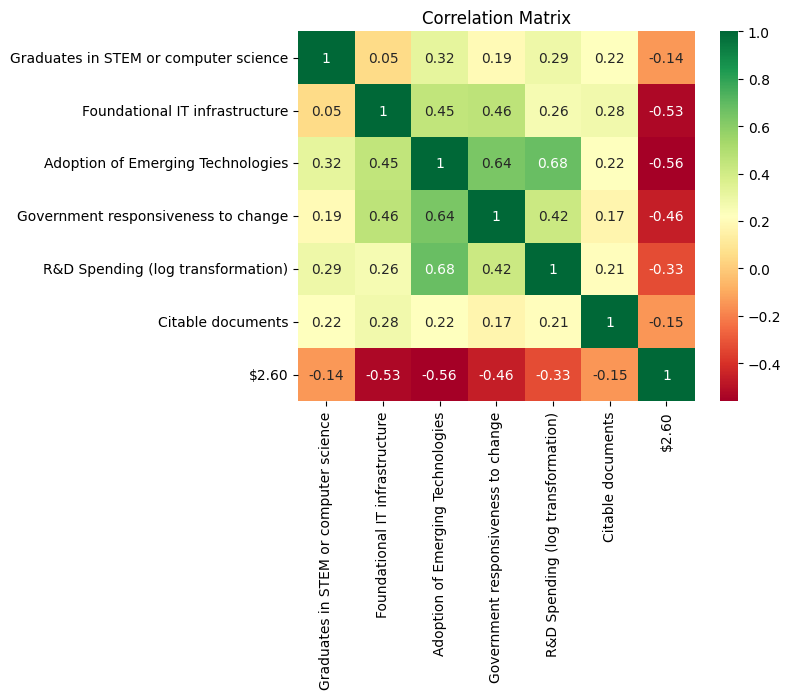

In [ ]:
#wd_dev_map1 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
heatmap = sns.heatmap(wd_dev_map1.corr().round(2), cmap="RdYlGn", annot=True)
# Title for the heatmap
plt.title('Correlation Matrix')
plt.show()



**Observation from Correlation Matrix:**

1. There is a strong relationship between R&D Spending and Adoption of Emerging Technology. **Which shows that a country spending in Research and Development shows their willingness to adopt emerging technology.**

2. There is not much relationship between the number of Graduates in STEM and a country's Number of AI citable documents. **That means even if a country has more graduate students interested from STEM, it doesn't mean they will go on to do research in A.I.**

3. There is negligible relationship between the number of Graduates in STEM and a country's Foundational I.T Infrastructure. **One would think that if a country has Foundational I.T Infrastructure, more students would go into STEM.**

4. Poverty (<$2.60 daily income) shows a negative correlation with all other factors. **In other words, when the other variables (Foundational IT Infrastructure, Adoption of Emerging Technologies, etc) improves, a countries poverty level decreases.**

**2. SCATTERPLOT**

We created scatterplots to compare the data sets, visualize their relationships, identify patterns, and detect outliers.


In [ ]:
import pandas as pd
import plotly.express as px


# List African countries to higlight
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Ivory Coast', 'Democratic Republic of the Congo', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
    'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']  # Replace with actual country names

# Create a new column for symbols in wd_dev_map1
wd_dev_map1['Symbol'] = wd_dev_map1['Country'].apply(lambda x: 'triangle' if x in african_countries else 'circle')
wd_dev_map1['Size'] = 5

# Plot using the 'Symbol' and 'Size' columns
fig = px.scatter(wd_dev_map1,
                 x='Adoption of Emerging Technologies',
                 y='Government responsiveness to change',
                 color='Foundational IT infrastructure',
                 symbol='Symbol',  # Use the new 'Symbol' column
                 size='Size',      # Use the new 'Size' column for point size
                 hover_data=['Country'],
                 width=1500, height=700)

# Adjust layout properties
fig.update_layout(
    title='Scatter Plot of Countries by Emerging Technologies and Government Responsiveness',
    xaxis_title='Adoption of Emerging Technologies',
    yaxis_title='Government Responsiveness to Change',
    font=dict(family="Arial, sans-serif", size=10, color="RebeccaPurple")
)


**Observation from Scatterplot:**

1. We found it interesting that overall, there was an upward trend, showing a positive relationship in Governments Responsiveness to change and their Adoption of Emerging Technology.

2. Also, there wasn't an obvious pattern showing a country's Foundational I.T Infrastructure and Adoption of Emerging Technology

3. Overall, countries in Africa showed a government responsiveness to change of less than 50, which also reflected in their Adoption of Emerging Technology, as symbolised by the cluster of circle shapes.

4. Mauritania appeared to be an outlier, showing very low government responsiveness despite average adoption of Emerging Technologies etc

**3. Comparing Foundational IT infrastructure and Graduates of STEM**

We want to map Foundational IT infrastructure across countries and compare it to the Graduates in STEM, to compare if a country's IT infrastructure influences the number of graduates in STEM.




Code

In [ ]:
# Merge using outer join
wd_dev_map2 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_dev_map1[['Country', 'Foundational IT infrastructure']]
#print(result)

# Merge using inner join to keep exact matches
wd_dev_map2 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


<Axes: >

[]

[]

<Axes: >

[]

[]

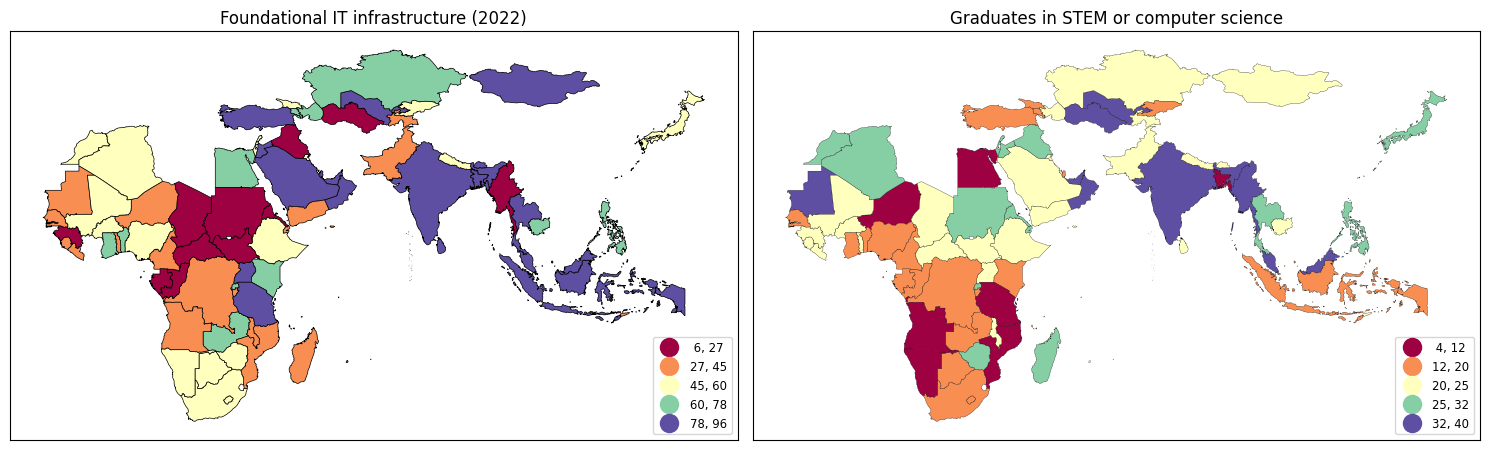

In [ ]:
#Plot Against Graduates in STEM

fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True) #aok maybe better flip this way
wd_dev_map2.plot(ax=axs[0],column='Foundational IT infrastructure',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Foundational IT infrastructure (2022)")
axs[0].set_xticks([]); axs[0].set_yticks([])

wd_dev_map2.plot(ax=axs[1],column='Graduates in STEM or computer science',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Graduates in STEM or computer science")
axs[1].set_xticks([]); axs[1].set_yticks([])

**Observation**

1. Although countries like Mongolia in Asia and Saudi Arabia in the Middle East have good Foundational I.T Infrastructure, it doesn't reflect in the number of Graduates in STEM.

2. Compared to other regions, countries in Africa have poor IT infrastructure which also reflects in their number of Graduates from STEM programs.

<Axes: >

[]

[]

<Axes: >

[]

[]

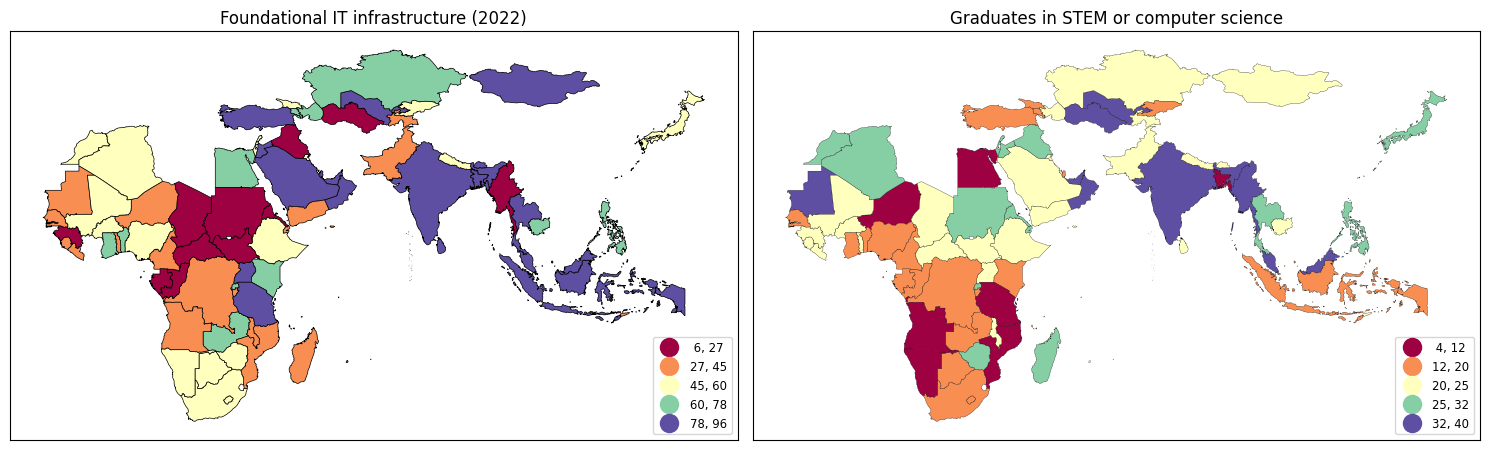

In [ ]:
#Plot Poverty Against Foundational IT Infrastructure

fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True) #aok maybe better flip this way
wd_dev_map2.plot(ax=axs[0],column='Foundational IT infrastructure',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Foundational IT infrastructure (2022)")
axs[0].set_xticks([]); axs[0].set_yticks([])

wd_dev_map2.plot(ax=axs[1],column='Graduates in STEM or computer science',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Graduates in STEM or computer science")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

<Axes: >

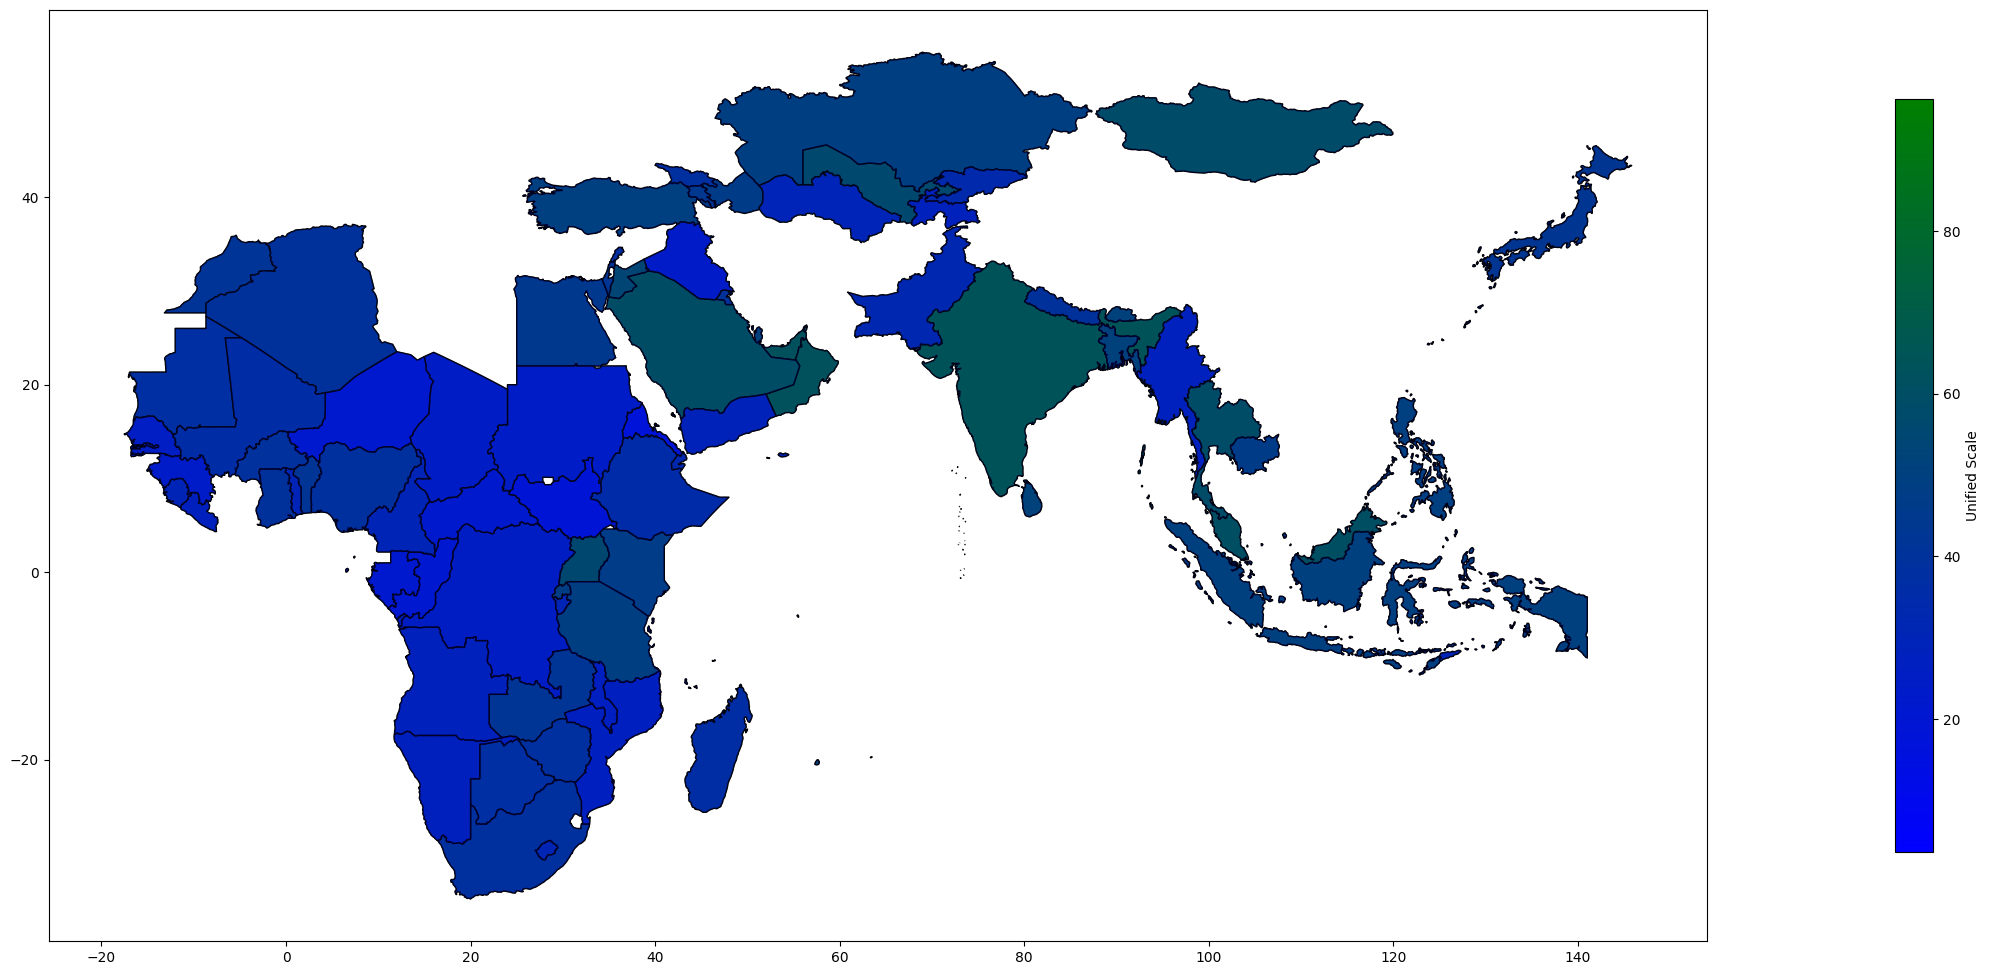

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

col1 = 'Foundational IT infrastructure'
col2 = 'Graduates in STEM or computer science'

# Normalizing data to a common scale
norm = Normalize(vmin=min(wd_dev_map2[col1].min(), wd_dev_map2[col2].min()),
                 vmax=max(wd_dev_map2[col1].max(), wd_dev_map2[col2].max()))

fig, ax = plt.subplots(figsize=(20, 15))

# Define a custom color map that combines red and green
colors_list = ['blue', 'green']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors_list, N=256)

# Plotting both layers using normalisation for the color maps
wd_dev_map2.plot(ax=ax, column=col1, cmap=custom_cmap, norm=norm, legend=False, edgecolor='k')
wd_dev_map2.plot(ax=ax, column=col2, cmap=custom_cmap, norm=norm, legend=False, edgecolor='k', alpha=0.5)

# Creating a color bar scale for the map
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Unified Scale')

# Show the plot
plt.tight_layout()
plt.show()


**Analysis of Poverty Rate Across the Considered Regions**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase


fig = px.choropleth(poverty_rate, #aok this doesnt make sense! the variable is NOT categorical; need a color ramp
                    locations=poverty_rate.columns[0], # assuming first column contains country names
                    locationmode='country names',
                    color=poverty_rate.columns[1], color_continuous_scale="Viridis",# assuming second column contains percentage living below $2.60 a day
                    #hover_name=poverty_rate.columns[1],
                   # range_color=[0, 5],# using red color scale
                    title="Poverty Rate (%) per Country living on less than $2.60 per day")

fig.show()

**4. Citable AI research papers per capita**

We want to map percentage of AI research papers across countries.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.



Merge AI research papers

In [ ]:
wd_dev_map3 = pd.merge(wd_dev_map, ai_paper, on='Country', how='outer', indicator=True)
wd_dev_map3._merge.value_counts()

both          75
left_only     12
right_only     7
Name: _merge, dtype: int64

In [ ]:
wd_dev_map3.dtypes

Country                object
geometry             geometry
Citable documents     float64
_merge               category
dtype: object

In [ ]:
# Merge using outer join
wd_dev_map3 = pd.merge(wd_dev_map, ai_paper, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = ai_paper[['Country', 'Citable documents']]
print(result)

# Merge using inner join to keep exact matches
wd_dev_map4 = pd.merge(wd_dev_map3, ai_paper, on='Country', how='inner', indicator=False)


         Country  Citable documents
1          India              22346
5          Japan               3964
7      Indonesia               3226
11   South Korea               2546
12      Malaysia               2127
..           ...                ...
167      Somalia                  1
168         Chad                  1
169         Togo                  1
170        Congo                  1
172  Timor-Leste                  1

[82 rows x 2 columns]


In [ ]:
fig = px.choropleth(ai_paper,
                    locations=ai_paper.columns[0], # assuming first column contains country names
                    locationmode='country names',
                    color=ai_paper.columns[1], # assuming second column contains number of AI papers
                    hover_name=ai_paper.columns[1],
                    color_continuous_scale="reds",
                    range_color=[0, 5000],# using red color scale
                    title="Number of Citable AI Papers by Country (2022)")

fig.show()

**Observation**

1. Overall, countries in Africa have low numbers of Citable papers on A.I (less than 1000), compared to countries in other regions, which points to the fact that overall, research in AI is low in Africa.  However, India has as many as 23,000 Citable papers on AI, which is reflective of the population.

2. Even countries in war torn regions in the Middle East are researching about AI.

**5. R & D Spending**

We decided to check how countries spend and invest in research and development for technology initiatives.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
#wd_dev_map5 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
#wd_dev_map5[['Country','_merge']]

In [ ]:
# Merge using outer join
wd_dev_map5 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = ai_readiness_indicators[['Country', 'R&D Spending (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_dev_map6 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_dev_map6.plot(ax=ax,column='R&D Spending (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''R&D Spending''')
ax.title.set_text("R&D Spending (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observations**


**6. Government Responsivesness to Change**

We want to map Governments Responsivesness to Change across countries. How ready is a government willing to accept a change in policy, technology etc.

First need to get the map with countries (wd_map), then the Data_1 on AI Readiness Indicators and merge with countries data and finaly color code the polygons.


Merge Government's Responsiveness to Change

In [ ]:
# Merge using outer join
wd_dev_map7 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = ai_readiness_indicators[['Country', 'Government responsiveness to change']]
print(result)

# Merge using inner join to keep exact matches
wd_dev_map8 = pd.merge(wd_dev_map7, ai_readiness_indicators, on='Country', how='inner', indicator=False)


In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_dev_map7.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Most countries in Africa have government with low responsiveness to change also have a low AI readiness index.


# **RECOMMENDATIONS AND LIMITATIONS**

**RECOMMENDATIONS**

These recommendations are country and region specific which will be reflected in our implementation of our project initiative.

Governments should consider the following:

1. Strengthen STEM Education:
Invest in STEM education to cultivate a skilled workforce, vital for driving AI initiatives and fostering innovation in governance.Including incentivizing students going into STEM (scholarships, increased job certainty for STEM profesionals)

2. Government-Industry Collaboration:
Governments should foster collaboration between government and private industry for capacity building through workshops, training, and partnerships, enhancing officials' technological understanding.

3. Strategic IT Infrastructure:
Prioritize foundational IT infrastructure development, including secure data storage and high-speed internet, to provide a robust backbone for successful AI implementation.

4. Incentives for Innovation:
Government should introduce incentives such as funding and tax benefits to stimulate AI innovation, encouraging public-private collaboration to address specific governance challenges effectively.

5. Proactive Change Management:
Government should implement proactive change management strategies, including training programs and communication channels, to enhance government responsiveness, fostering a culture of adaptability and innovation.


**MISSING VALUES**

In carrying out this research project, some of the limitations we experienced include:

1. Data Integration Challenges: Obtaining data from diverse sources may have varying data formats, structures, and levels of completeness. The absence of standardized data formats across platforms led to difficulties in merging datasets, resulting in gaps and missing values.

**LIMITATIONS**

In carrying out this research project, some of the limitations we experienced include:

1. Poor representation of data:
We realized that in gathering our data, previous researchers didn't give specific information about the measures they used when collatings data.

2. Lack of data:
Since our data was collected from different sources, while some variables where available in one source, it could be missing in another, which made merging a bit difficult.

3. Data Availability and Quality:
Many of the countries have limited data on AI adoption, making it challenging to gather comprehensive and reliable information. Incomplete or inaccurate data could affect the validity of the study's conclusions and the ability to make broad generalizations about the continent.

4. Regional Variations:
The countries are vast and diverse with significant regional disparities in terms of infrastructure, population, and access to technology. We experienced struggle in capturing these regional variations, potentially leading to a lack of nuance in the findings.

5. Language and Cultural Diversity:
The linguistic and cultural diversity across may have posed challenges in terms of data collection and interpretation for the primary researchers, which affected survey responses and interviews, making it difficult to draw meaningful comparisons or identify common trends.

6. Technological Infrastructure:
The availability and quality of technological infrastructure, including internet access and electricity, vary widely across  countries. Limited infrastructure can hinder the adoption of AI and may skew research findings if not adequately accounted for.

7. Sample Bias:
The primary researchers did not give a representative sample of the countries for their study. Selection bias, where certain groups or regions are overrepresented (SouthEast Asia) or underrepresented (Africa), can limit the generalizability of the findings.

Decision-makers relying on some of the data from this research for strategic planning may face challenges since some crucial data points are unavailable, potentially limiting the effectiveness and accuracy.
